# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.309 ,  0.773 ,  0.6249,  0.1513,  0.9721,  0.5607,  0.5958,  0.1851,  0.8938,  0.0681,
        0.089 ,  0.5714,  0.9064,  0.8856,  0.7797,  0.8966,  0.7707,  0.7058,  0.0378,  0.74  ,
        0.168 ,  0.2725,  0.5152,  0.2551,  0.4765,  0.0107,  0.5538,  0.6202,  0.6692,  0.7997])

In [6]:
y

array([  8.9269,  10.319 ,   9.8746,   8.454 ,  10.9164,   9.682 ,   9.7875,   8.5554,  10.6815,
         8.2044,   8.2669,   9.7142,  10.7193,  10.6567,  10.3392,  10.6897,  10.312 ,  10.1174,
         8.1135,  10.22  ,   8.5039,   8.8176,   9.5456,   8.7654,   9.4294,   8.0321,   9.6615,
         9.8607,  10.0077,  10.399 ])

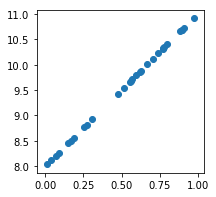

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.8753

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [13]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

KeyError: u'ffmpeg'